<a href="https://colab.research.google.com/github/Liso15/Projects/blob/main/supermarket_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SUPERMARKET_SALES DATA 
Data_source: kaggle.com
find trends and where to improve sales and profit

In [ ]:
# import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# get data
sp = pd.read_csv("supermarket_sales - Sheet1.csv")

In [ ]:
sp.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [ ]:
# list of all columns
list(sp.columns)

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Unit price',
 'Quantity',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'Payment',
 'cogs',
 'gross margin percentage',
 'gross income',
 'Rating']

In [ ]:
# total of all rows and columns
sp.shape

(1000, 17)

In [ ]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

EDA

In [ ]:
import matplotlib
matplotlib.style.use('ggplot')

Palette

In [ ]:
palette = ['#367C6E', '#EECD69', '#F3AC59', '#95AC41', '#E56F3E']

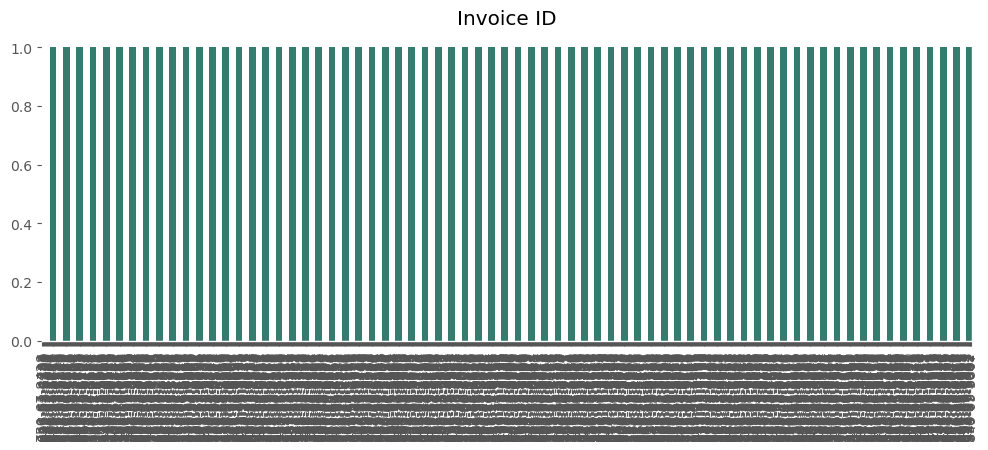

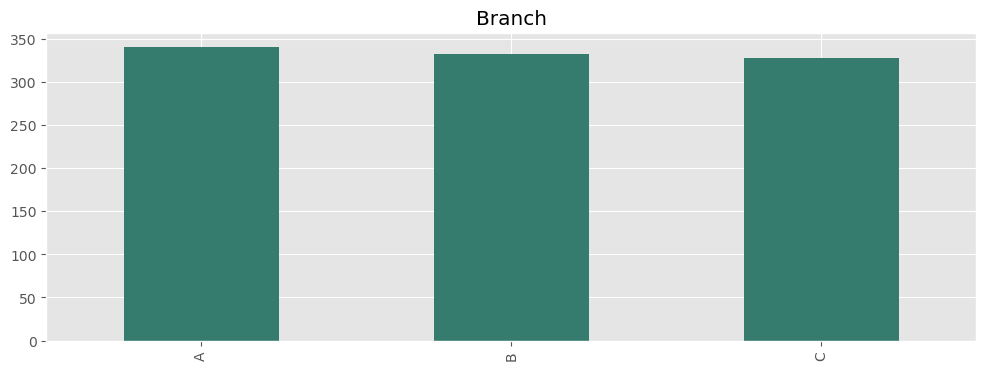

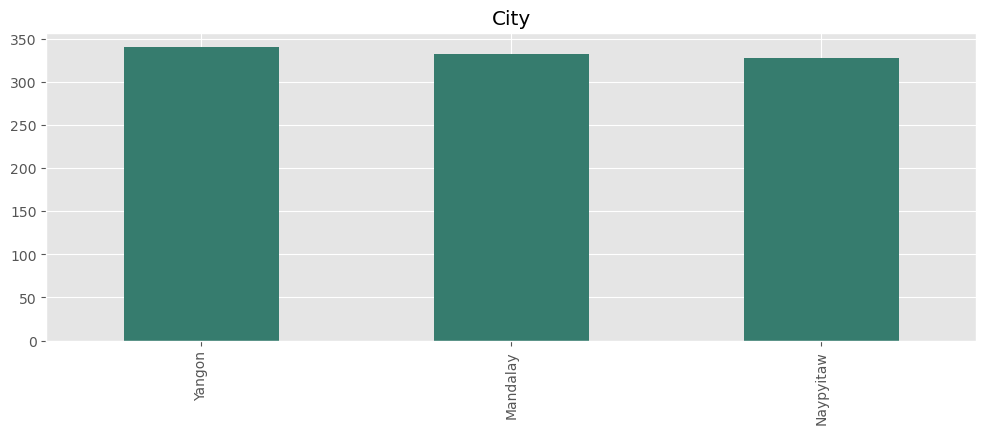

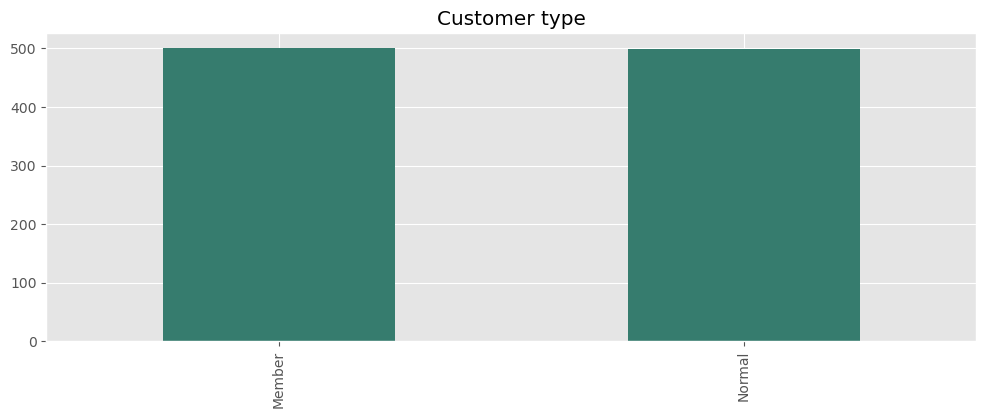

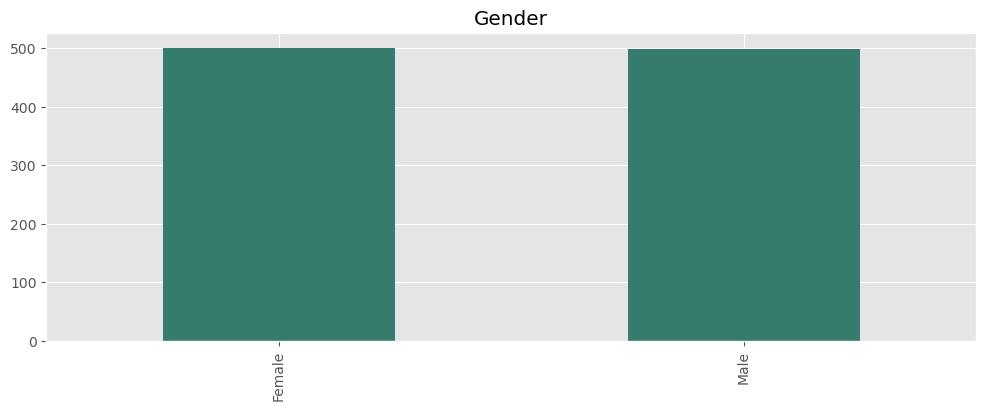

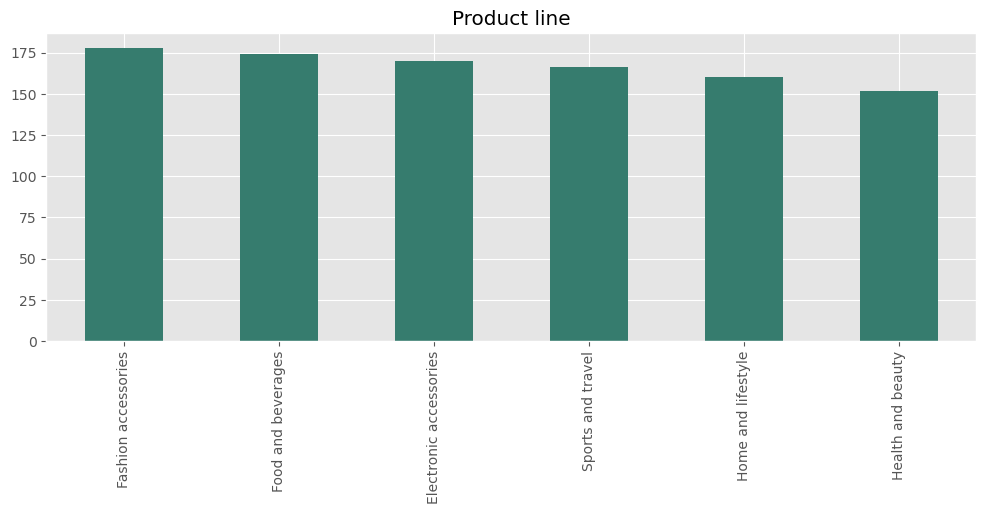

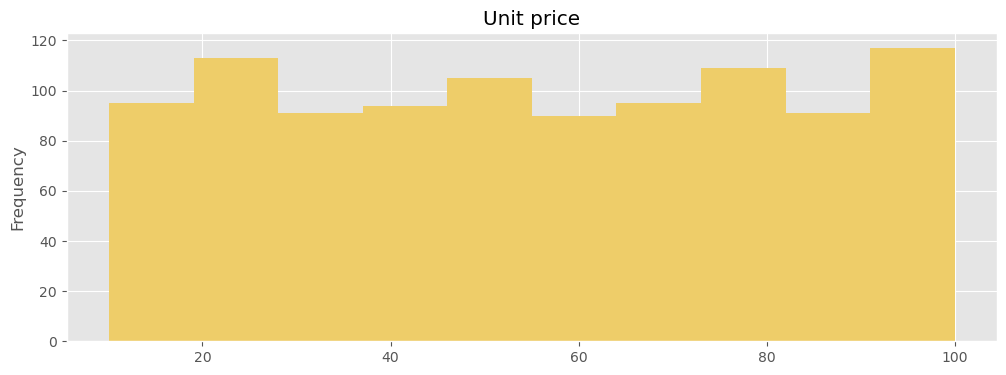

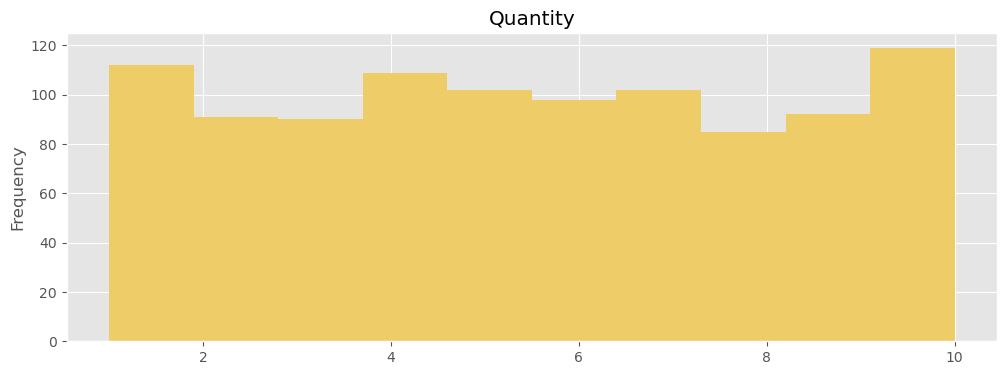

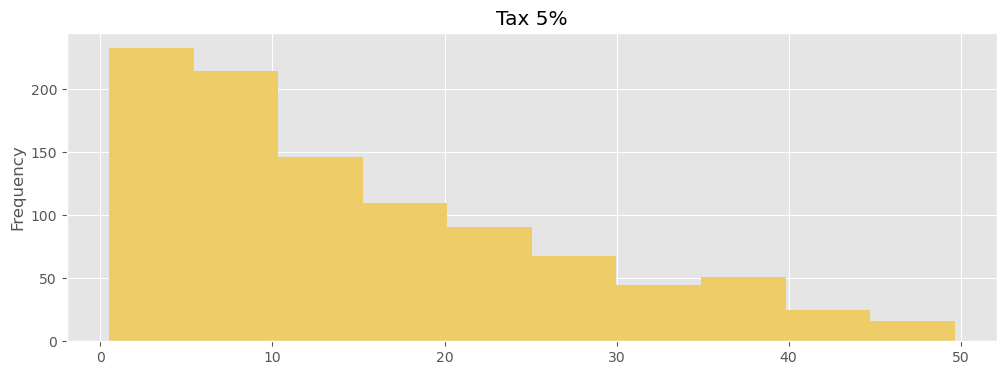

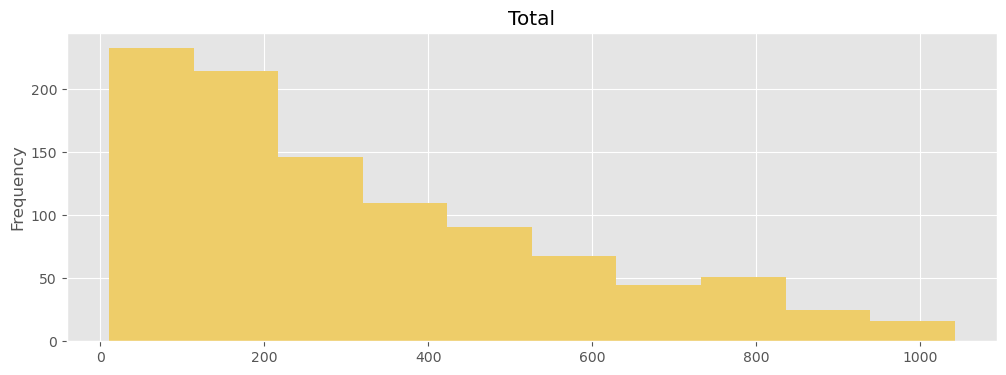

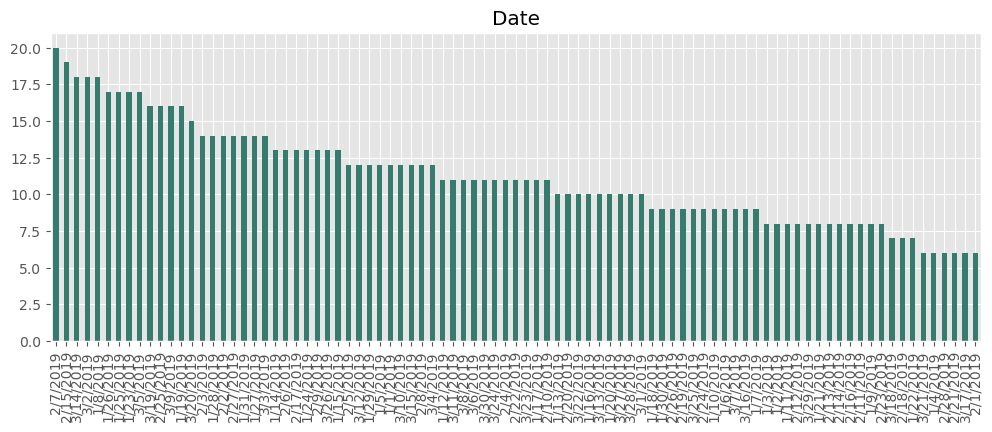

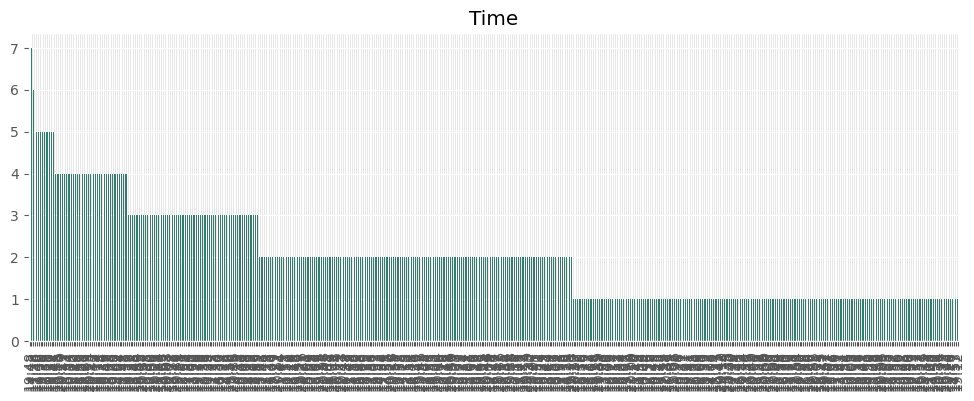

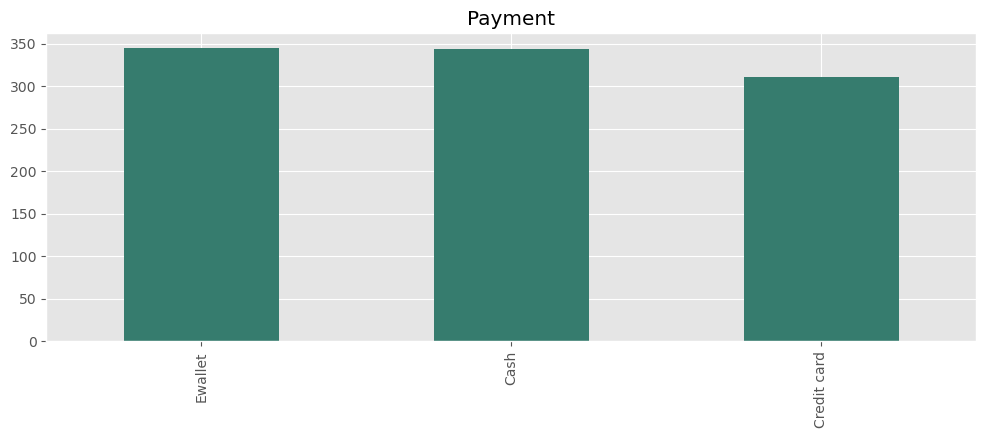

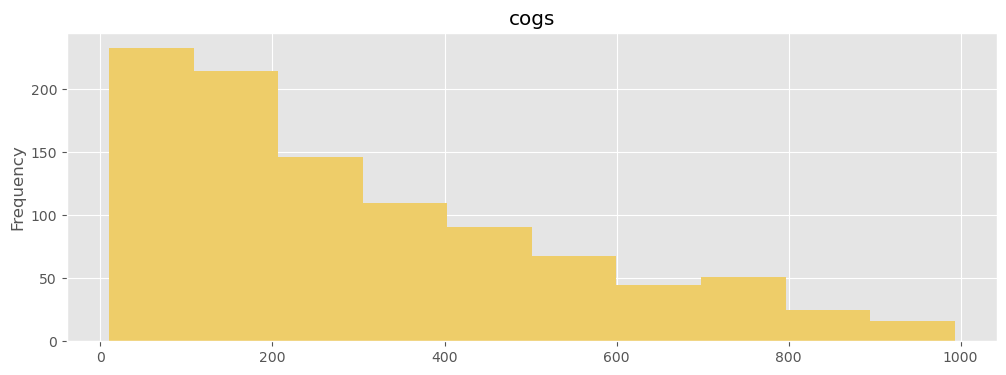

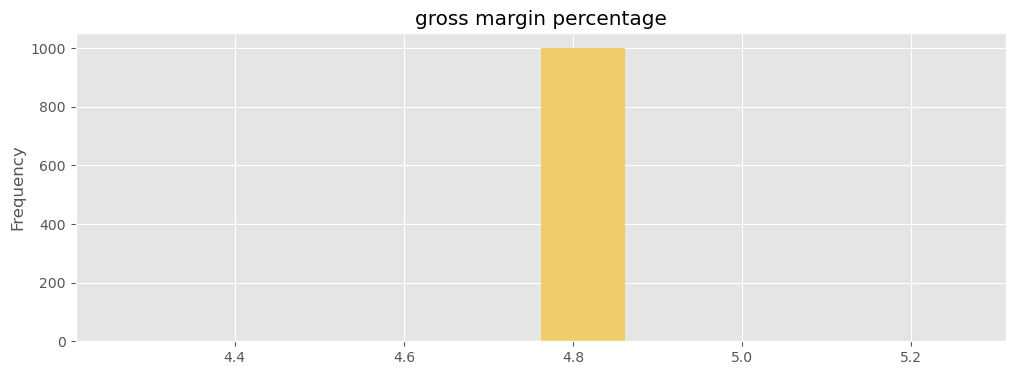

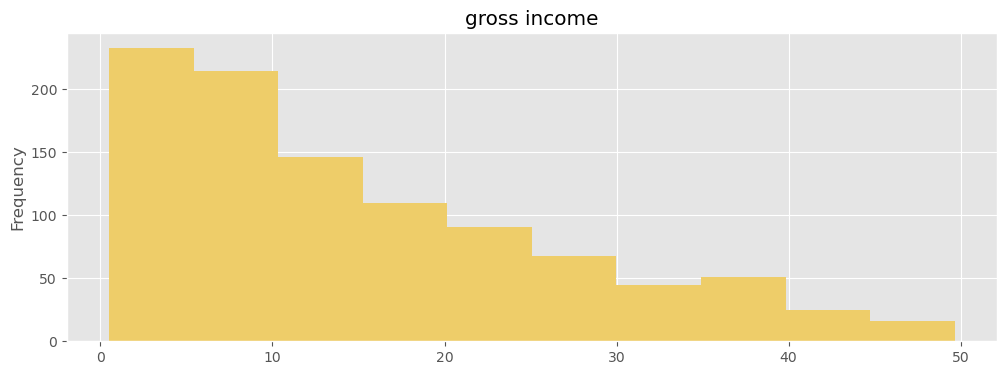

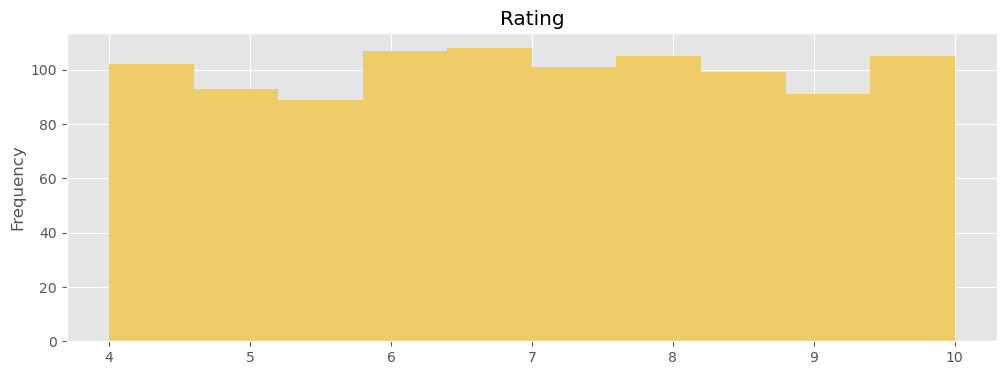

In [ ]:

for feat in sp.columns:
    if sp[feat].dtype == 'object':
        sp[feat].value_counts().plot(kind='bar', figsize=(12,4), title=feat, color=palette[0])
    else: 
         sp[feat].plot(kind='hist', figsize=(12,4), title= feat, color=palette[1])
    plt.show()

Observations
Custormers of the supermarket.
a). Branch-A is the most visited branch in the supermarket chain
b). Yangan city is made more sales
c). Customer type and Gender are contain equal categorical data. This no distint difference between value members and normal store buyers, and gender. 
Product
. Fashion and acceories made more sales while health and beauty made the least
. Unit price of 20,50,80,100 had more than 100 purchases.
. Quntity of 10 items is the highest, while 8 items was the lowest per store
. Tax 5% and Total are more distributed on the left side, while there outliers in the right side.
. Payment systme more prefred by customers is an eWallet than Credit card.
Income
. Cost of good sold: distributed on the left, while the are outliers on the right
. Gross income: distributed on the left, outliers on the right
. Gross marginal percentage: profit generated at 48% in all supermarket chain
. Rating: customers rated 6 and 7 brought from the supermarket chain.

Preprocessing

In [ ]:
sp["Date"]

0       1/5/2019
1       3/8/2019
2       3/3/2019
3      1/27/2019
4       2/8/2019
         ...    
995    1/29/2019
996     3/2/2019
997     2/9/2019
998    2/22/2019
999    2/18/2019
Name: Date, Length: 1000, dtype: object

In [ ]:
# Datetime column
sp['Month'] = pd.DatetimeIndex(sp['Date']).month

In [ ]:
sp['Date'].value_counts()

2/7/2019     20
2/15/2019    19
3/14/2019    18
3/2/2019     18
1/8/2019     18
             ..
1/4/2019      6
2/28/2019     6
2/21/2019     6
3/17/2019     6
2/1/2019      6
Name: Date, Length: 89, dtype: int64

Income Analysis

In [ ]:
sp["gross income"].describe()

count    1000.000000
mean       15.379369
std        11.708825
min         0.508500
25%         5.924875
50%        12.088000
75%        22.445250
max        49.650000
Name: gross income, dtype: float64

<Axes: xlabel='gross income'>

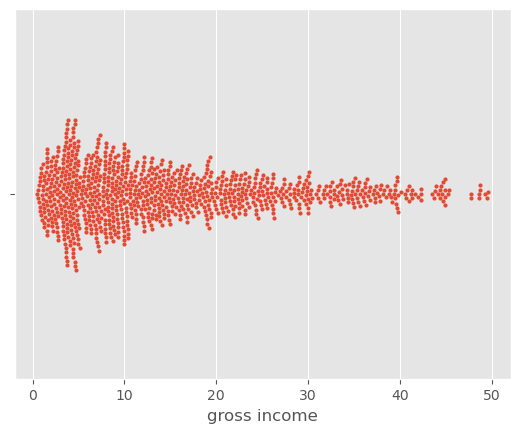

In [ ]:
sns.swarmplot(data=sp, x='gross income', s= 3)

In [ ]:
# gross_ cat
maxv = sp['gross income'].max()
minv = sp['gross income'].min()
bns= [minv,5,12,22, maxv ]
sp['gross_cat'] = pd.cut(sp['gross income'], bins=bns, labels=bns[:-1])


In [ ]:
# gross_cat is now a category

sp.groupby('gross_cat').mean()

C:\Users\Liso\AppData\Local\Temp\ipykernel_10720\2363855891.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sp.groupby('gross_cat').mean()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
gross_cat,,,,,,,,,
0.5085,38.555426,2.363229,3.148372,66.115816,62.967444,4.761905,3.148372,6.832287,2.026906
5.0,43.556766,4.936803,8.381801,176.017823,167.636022,4.761905,8.381801,7.201859,2.018587
12.0,59.803862,6.126016,16.452530,345.503140,329.050610,4.761905,16.452530,6.956504,1.971545
22.0,79.063525,8.226054,32.087151,673.830178,641.743027,4.761905,32.087151,6.875862,1.957854


Distribution by gross _cat

In [ ]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Invoice ID               1000 non-null   object  
 1   Branch                   1000 non-null   object  
 2   City                     1000 non-null   object  
 3   Customer type            1000 non-null   object  
 4   Gender                   1000 non-null   object  
 5   Product line             1000 non-null   object  
 6   Unit price               1000 non-null   float64 
 7   Quantity                 1000 non-null   int64   
 8   Tax 5%                   1000 non-null   float64 
 9   Total                    1000 non-null   float64 
 10  Date                     1000 non-null   object  
 11  Time                     1000 non-null   object  
 12  Payment                  1000 non-null   object  
 13  cogs                     1000 non-null   float64 
 14  gross mar

In [ ]:
palette = ['#367C6E', '#EECD69', '#F3AC59', '#95AC41', '#E56F3E']

c:\Users\Liso\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


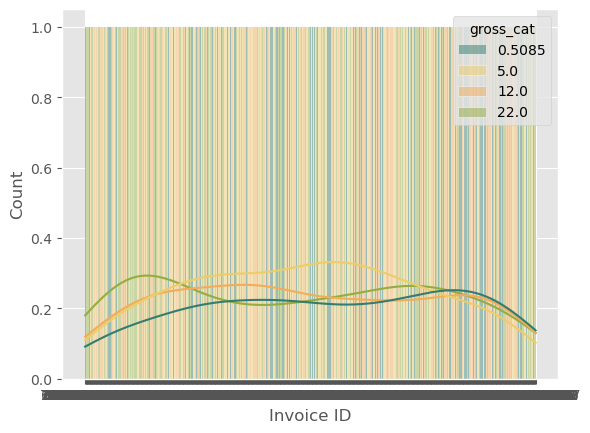

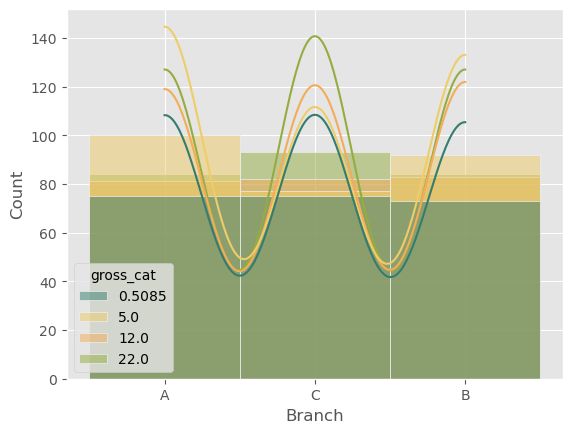

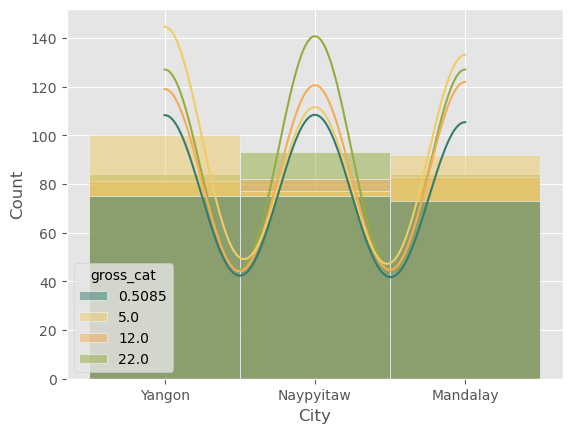

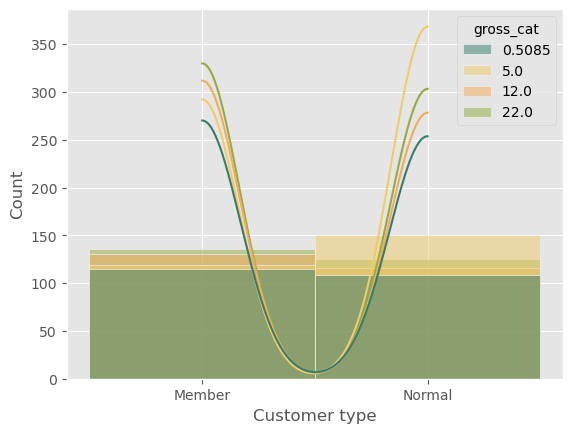

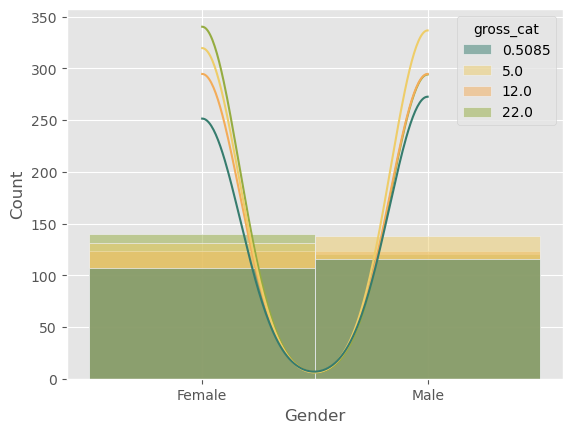

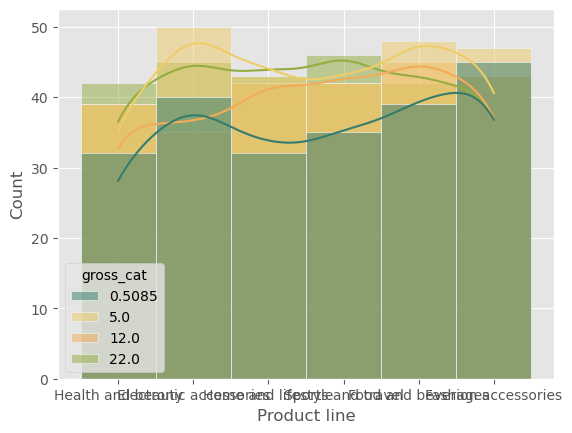

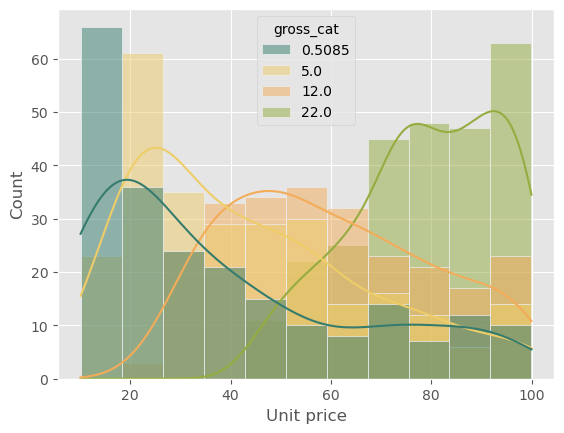

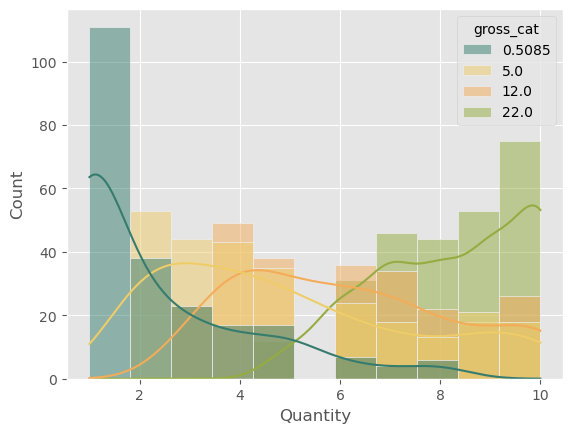

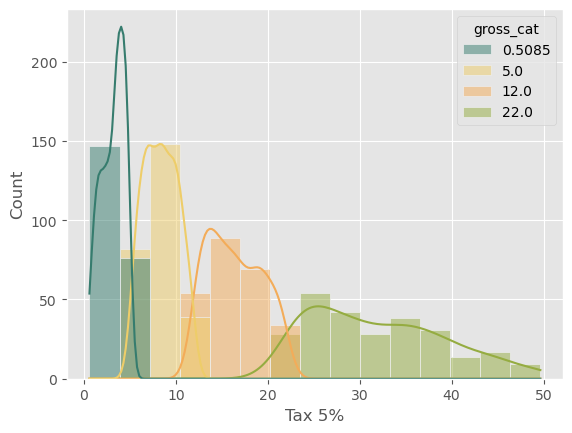

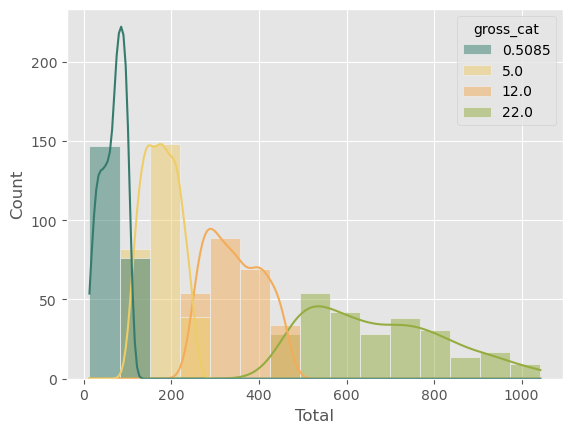

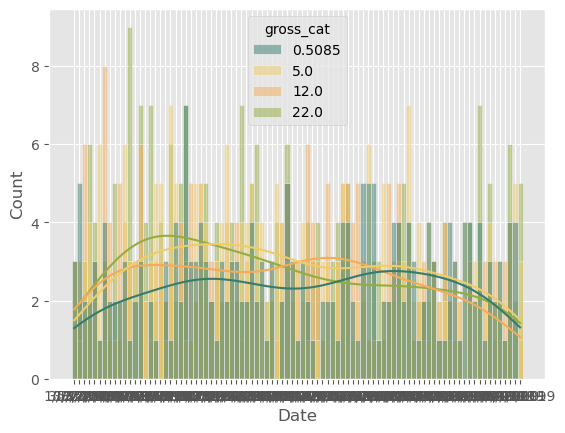

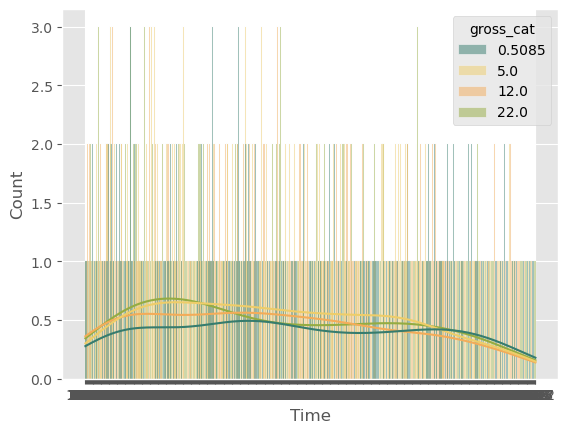

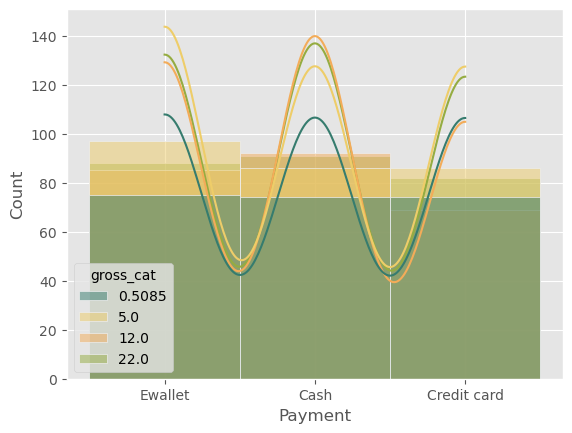

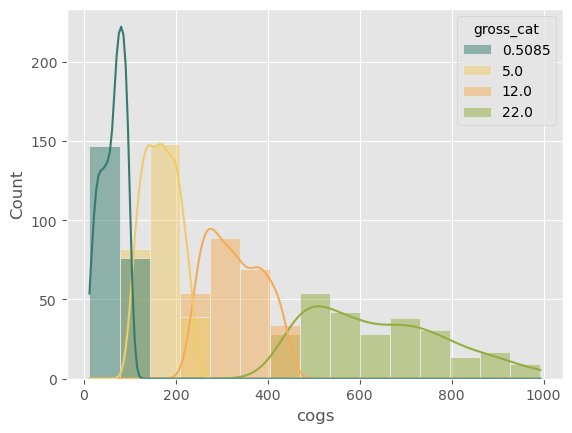

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

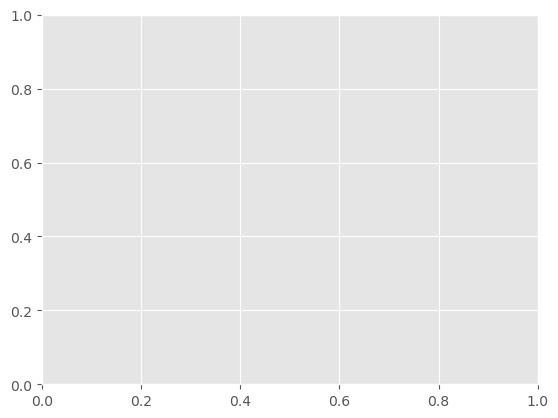

In [ ]:
for feat in sp.columns:
    if (sp[feat].dtype != 'object') | (feat != 'gross_cat') | (feat != 'Month'):
      sns.histplot(data=sp, x=feat , hue='gross_cat', palette=palette[:4], kde=True)
      plt.show()

Cumulative distributions

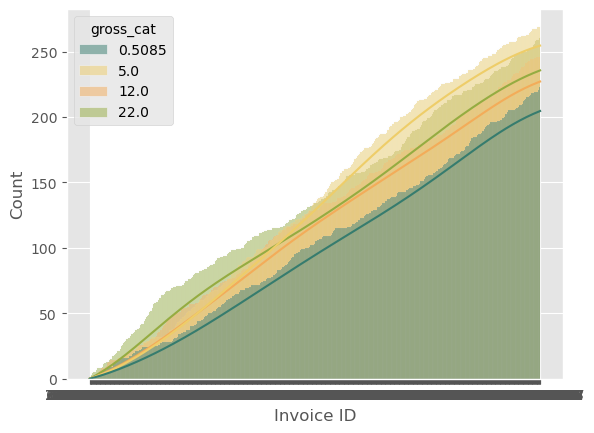

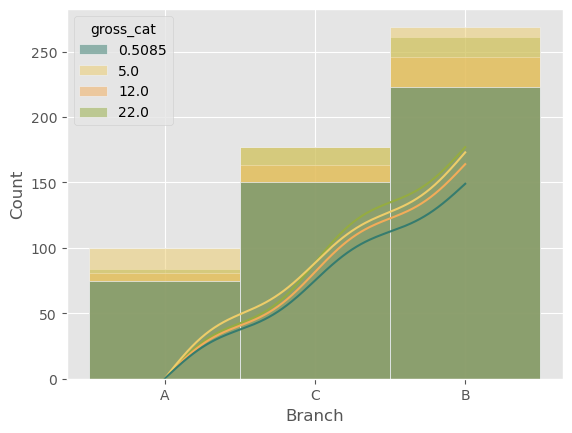

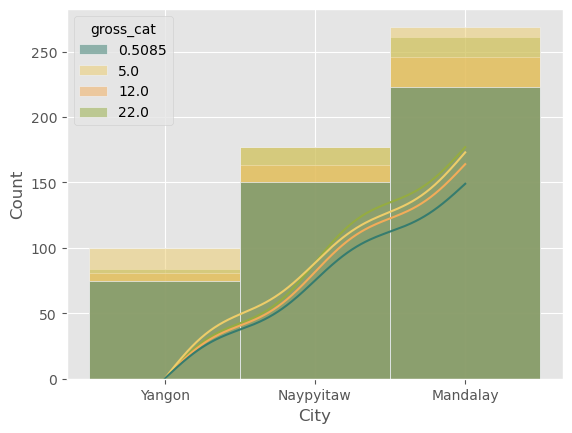

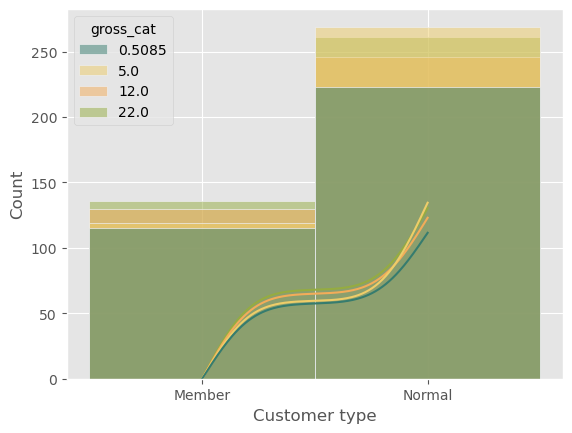

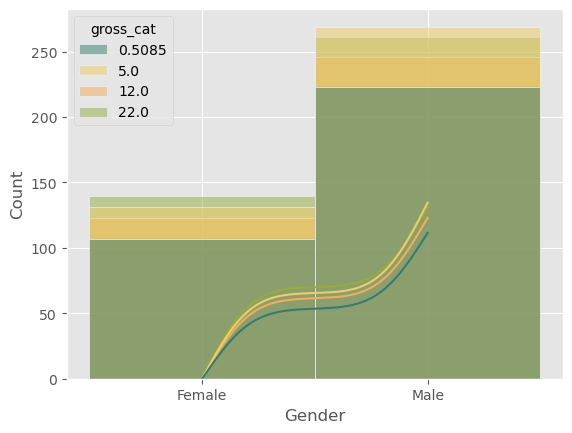

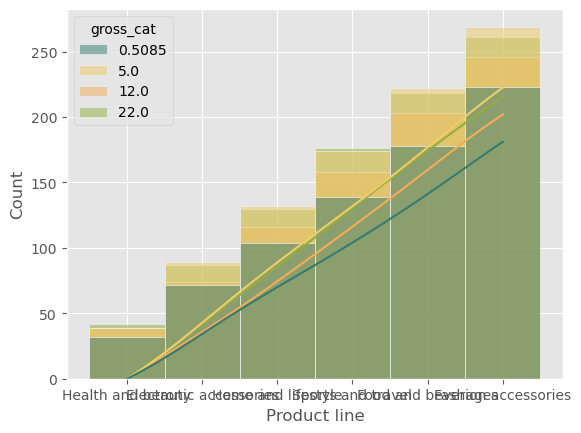

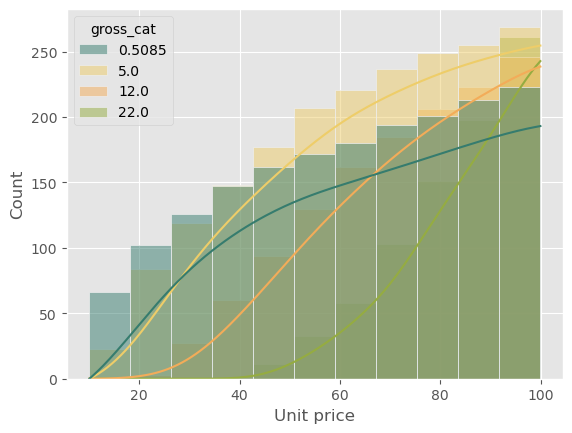

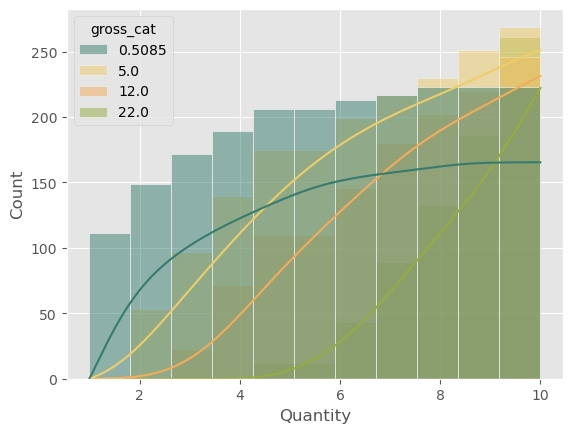

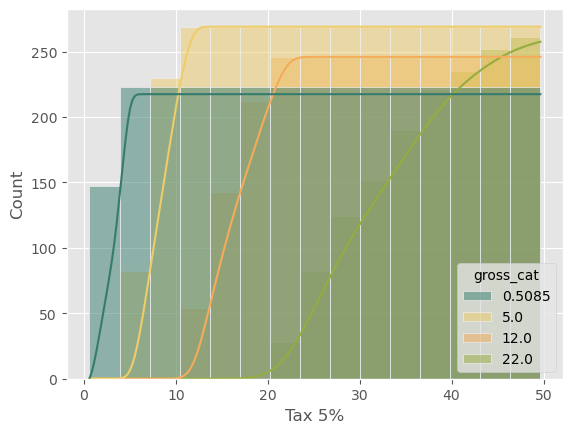

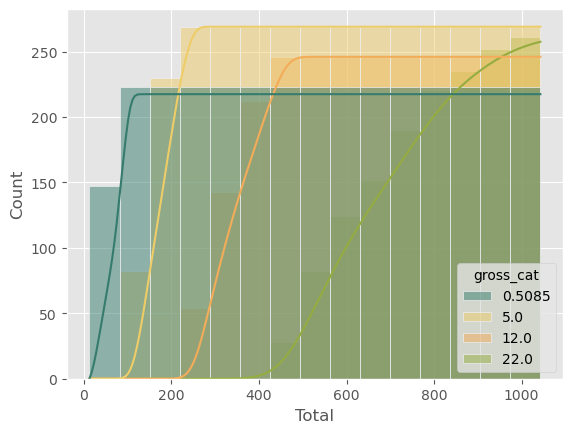

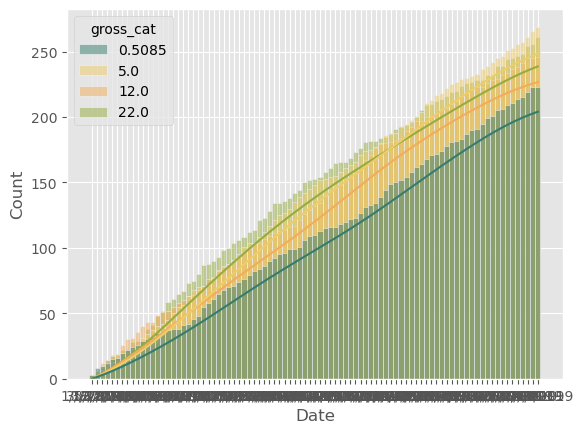

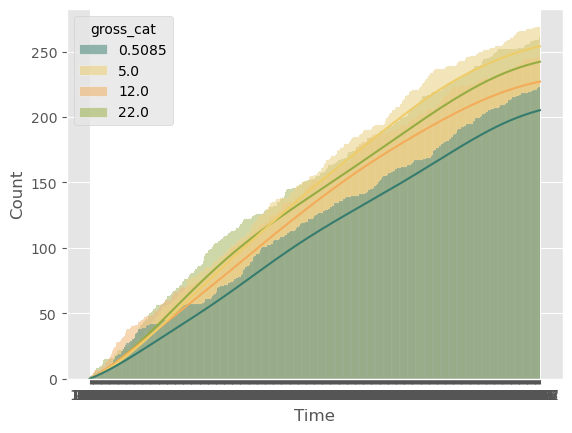

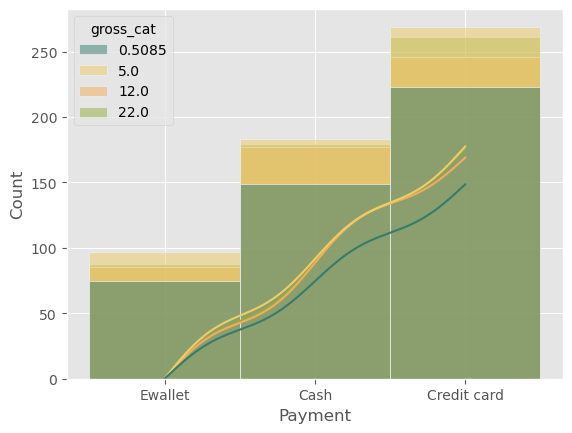

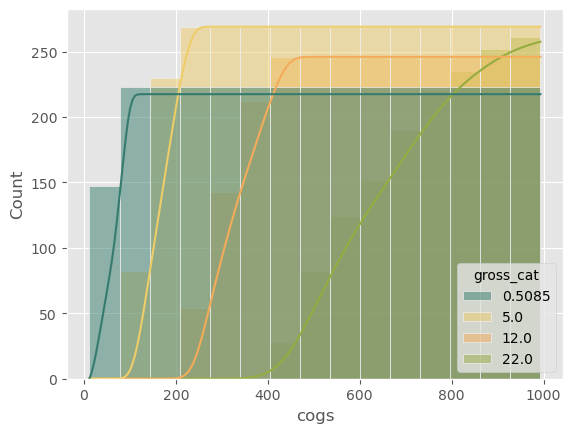

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

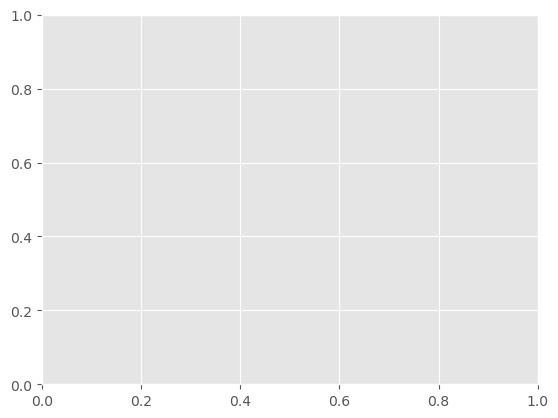

In [ ]:
for feat in sp.columns:
    if (sp[feat].dtype != 'object') | (feat != 'gross_cat') | (feat != 'Month'):
      sns.histplot(data=sp, x=feat , hue='gross_cat', palette=palette[:4], kde=True,cumulative=True)
      plt.show()

correlations

In [ ]:
sp.corrwith(sp['gross income'].sort_values(ascending=False))

C:\Users\Liso\AppData\Local\Temp\ipykernel_10720\2437449872.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sp.corrwith(sp['gross income'].sort_values(ascending=False))


Unit price                 0.633962
Quantity                   0.705510
Tax 5%                     1.000000
Total                      1.000000
cogs                       1.000000
gross margin percentage         NaN
gross income               1.000000
Rating                    -0.036442
Month                     -0.022301
dtype: float64

Obsevations
customer
. Branch- branch B has higher frequence in gross income, than A, even though A branch had more transections or visted.
. City - Mandalay had more of the upper 75%, Mandalay is the city that is producing more revenue.
' Customer_Type - Normal customers drive more value in the supermarket chain than members.
. Gender - profile reveal that more males are revenue generating than females. 

Product
. Prouct Line - Fashion accessories more revenue generetive for the chain, health and beauty gross income is thin.
. Unit price- 40,50,60 unit price produce postive gross income. 39, 35,20,10 per unit price the supermarket chain doesnt produce any gross income only fair value.
. Quntity - the trend of how many items to revenue is between 4 and 6 respectivly. consumers buying less than < 4 items in the store generates less or no gross income.
Tax - consumers account for more value added tax at > 20 payable per item purchased.
. Total - the more they pay per items the more gross income for the total gross income for the supermarket chain.
. Payment - credit card account for more gross income generated per store in the supermarket chain followed by cash and lastely by Ewallet which is frequently used by our consumers.
Cost of goods sold - trend inclines as more gross income is generated by the stores.

correlations - corrwith [method]
Unit price - is postivily correlated to gross income.
Quanity - is also postivily correlated to gross income.
while
customer rating is not correlated to gross income.
seasonality (month) is not correlated to gross income.

In [ ]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Invoice ID               1000 non-null   object  
 1   Branch                   1000 non-null   object  
 2   City                     1000 non-null   object  
 3   Customer type            1000 non-null   object  
 4   Gender                   1000 non-null   object  
 5   Product line             1000 non-null   object  
 6   Unit price               1000 non-null   float64 
 7   Quantity                 1000 non-null   int64   
 8   Tax 5%                   1000 non-null   float64 
 9   Total                    1000 non-null   float64 
 10  Date                     1000 non-null   object  
 11  Time                     1000 non-null   object  
 12  Payment                  1000 non-null   object  
 13  cogs                     1000 non-null   float64 
 14  gross mar

product analysis
product by customer 

In [ ]:
sp.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Month', 'gross_cat'],
      dtype='object')

In [ ]:
# branch mean (average)

sp[['Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total','Payment','Branch']].groupby('Branch').mean()

C:\Users\Liso\AppData\Local\Temp\ipykernel_10720\140164687.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sp[['Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total','Payment','Branch']].groupby('Branch').mean()


,Unit price,Quantity,Tax 5%,Total
Branch,,,,
A,54.780853,5.467647,14.874001,312.354031
B,55.659277,5.481928,15.232024,319.872506
C,56.609024,5.582317,16.052367,337.099715


In [ ]:
# branch count
sp[['Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total','Payment','Branch']].groupby('Branch').count()

,Product line,Unit price,Quantity,Tax 5%,Total,Payment
Branch,,,,,,
A,340,340,340,340,340,340
B,332,332,332,332,332,332
C,328,328,328,328,328,328


In [ ]:
# brach sum
sp[['Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total','Payment','Branch']].groupby('Branch').sum()

C:\Users\Liso\AppData\Local\Temp\ipykernel_10720\2744894441.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sp[['Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total','Payment','Branch']].groupby('Branch').sum()


,Unit price,Quantity,Tax 5%,Total
Branch,,,,
A,18625.49,1859,5057.1605,106200.3705
B,18478.88,1820,5057.0320,106197.6720
C,18567.76,1831,5265.1765,110568.7065


In [ ]:
# City mean( averge)

sp[['Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total','Payment','City']].groupby('City').mean()

C:\Users\Liso\AppData\Local\Temp\ipykernel_10720\2619395038.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sp[['Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total','Payment','City']].groupby('City').mean()


,Unit price,Quantity,Tax 5%,Total
City,,,,
Mandalay,55.659277,5.481928,15.232024,319.872506
Naypyitaw,56.609024,5.582317,16.052367,337.099715
Yangon,54.780853,5.467647,14.874001,312.354031


In [ ]:
# City count

sp[['Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total','Payment','City']].groupby('City').count()

,Product line,Unit price,Quantity,Tax 5%,Total,Payment
City,,,,,,
Mandalay,332,332,332,332,332,332
Naypyitaw,328,328,328,328,328,328
Yangon,340,340,340,340,340,340


In [ ]:
# City sum
sp[['Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total','Payment','City']].groupby('City').sum()

C:\Users\Liso\AppData\Local\Temp\ipykernel_10720\2494120800.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sp[['Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total','Payment','City']].groupby('City').sum()


,Unit price,Quantity,Tax 5%,Total
City,,,,
Mandalay,18478.88,1820,5057.0320,106197.6720
Naypyitaw,18567.76,1831,5265.1765,110568.7065
Yangon,18625.49,1859,5057.1605,106200.3705


In [ ]:
# customer type averge

sp[['Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total','Payment','Customer type']].groupby('Customer type').mean()

C:\Users\Liso\AppData\Local\Temp\ipykernel_10720\3963778865.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sp[['Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total','Payment','Customer type']].groupby('Customer type').mean()


,Unit price,Quantity,Tax 5%,Total
Customer type,,,,
Member,56.206986,5.558882,15.609110,327.791305
Normal,55.135130,5.460922,15.148707,318.122856


In [ ]:
# customer type count
sp[['Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total','Payment','Customer type']].groupby('Customer type').count()

,Product line,Unit price,Quantity,Tax 5%,Total,Payment
Customer type,,,,,,
Member,501,501,501,501,501,501
Normal,499,499,499,499,499,499


In [ ]:
# customer type sum
sp[['Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total','Payment','Customer type']].groupby('Customer type').sum()

C:\Users\Liso\AppData\Local\Temp\ipykernel_10720\1614003569.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sp[['Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total','Payment','Customer type']].groupby('Customer type').sum()


,Unit price,Quantity,Tax 5%,Total
Customer type,,,,
Member,28159.70,2785,7820.164,164223.444
Normal,27512.43,2725,7559.205,158743.305


Observation
. Branch C which is Naypyitaw produced most revenue, in the last quarter.
. Members- their loyality benefited the supermarket group across, product, unit price, quantity, tax 5%, total and payment.

In [ ]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Invoice ID               1000 non-null   object  
 1   Branch                   1000 non-null   object  
 2   City                     1000 non-null   object  
 3   Customer type            1000 non-null   object  
 4   Gender                   1000 non-null   object  
 5   Product line             1000 non-null   object  
 6   Unit price               1000 non-null   float64 
 7   Quantity                 1000 non-null   int64   
 8   Tax 5%                   1000 non-null   float64 
 9   Total                    1000 non-null   float64 
 10  Date                     1000 non-null   object  
 11  Time                     1000 non-null   object  
 12  Payment                  1000 non-null   object  
 13  cogs                     1000 non-null   float64 
 14  gross mar

Seasonality

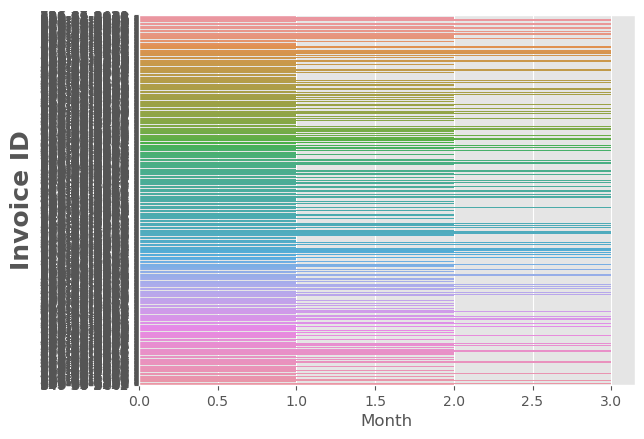

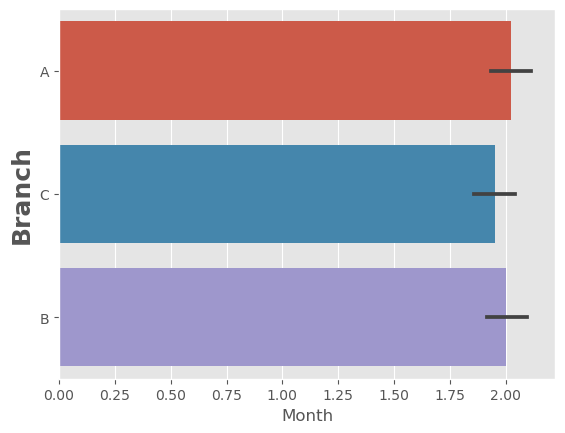

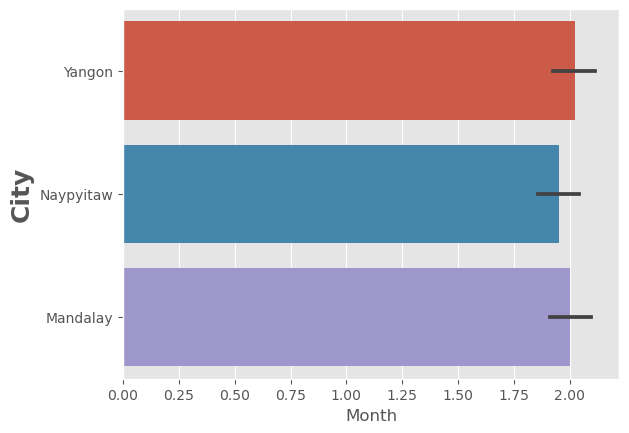

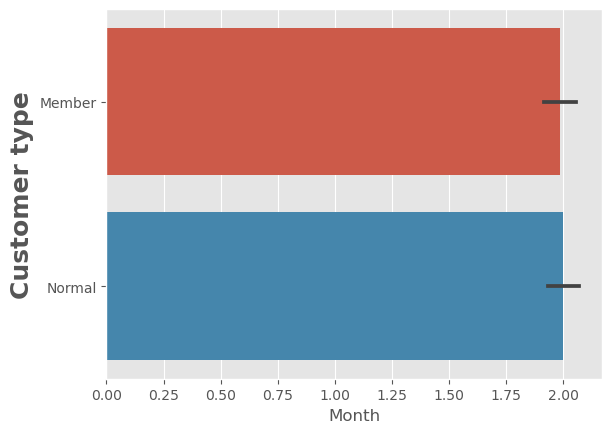

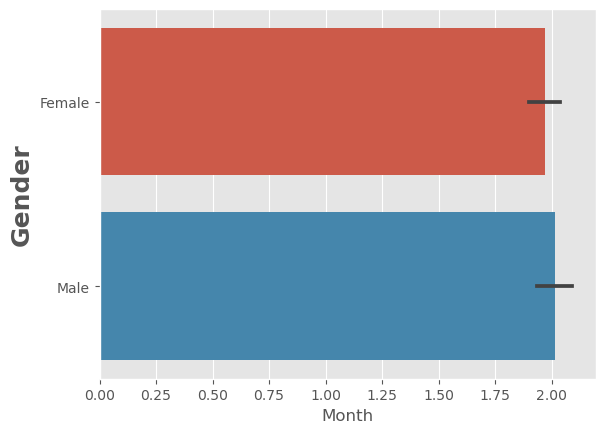

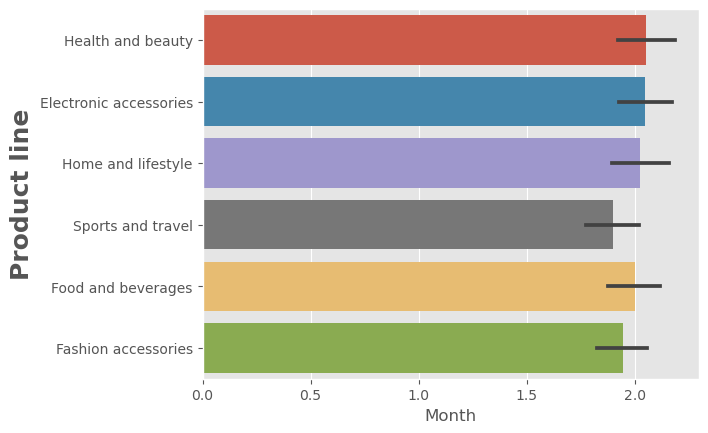

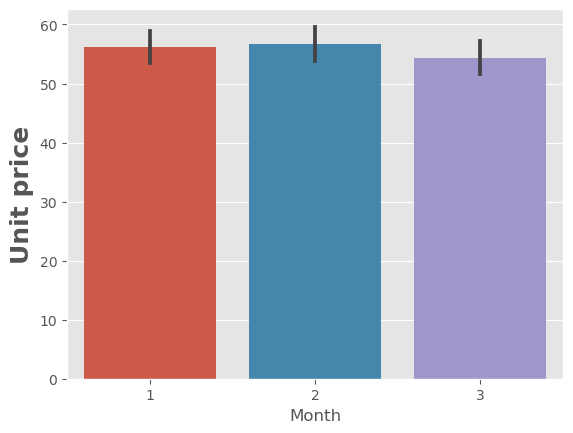

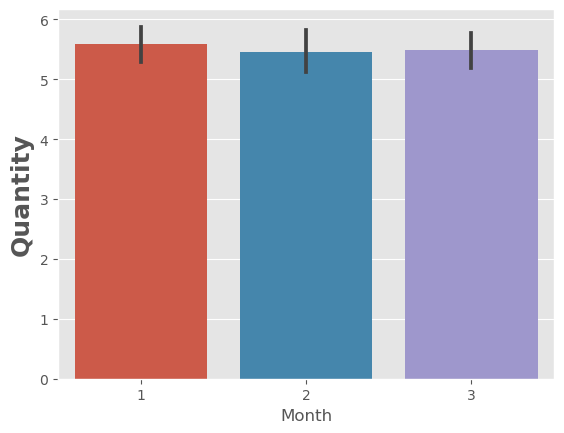

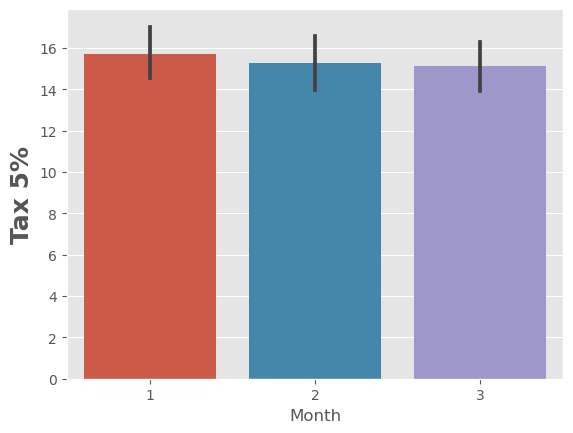

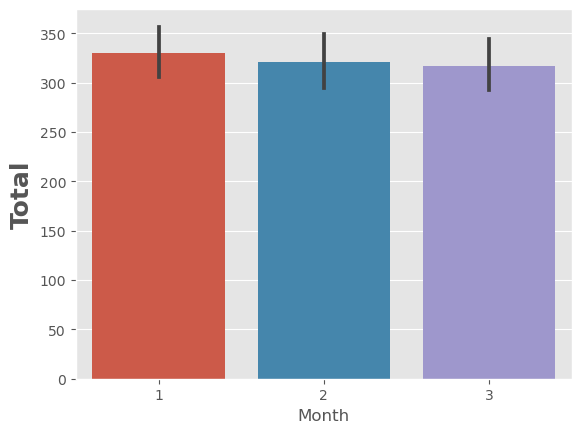

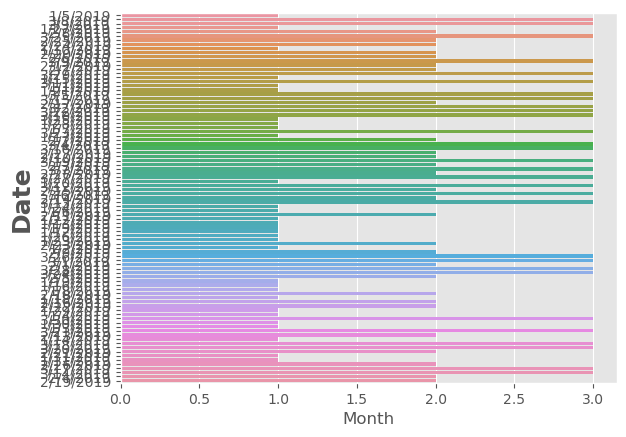

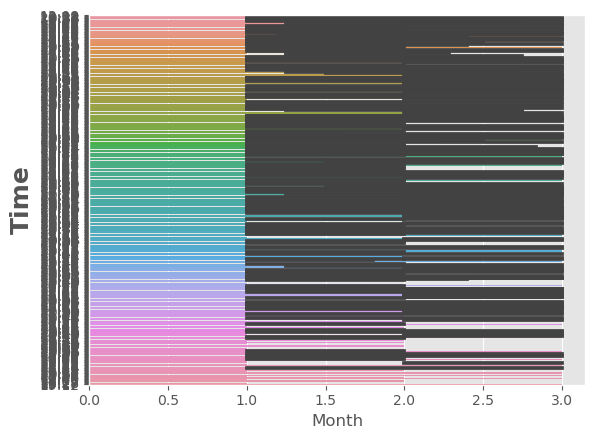

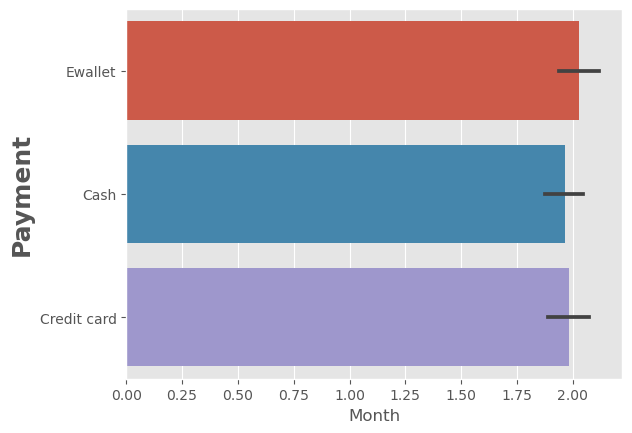

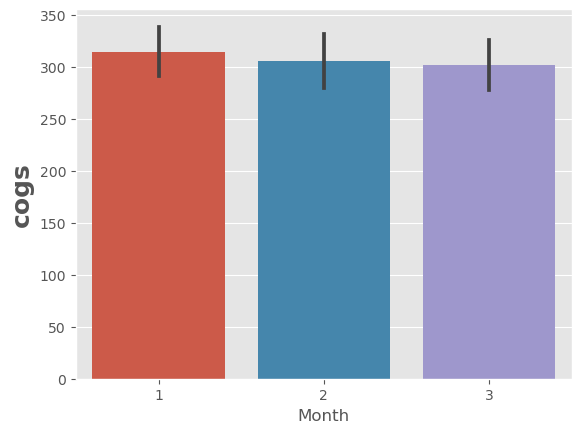

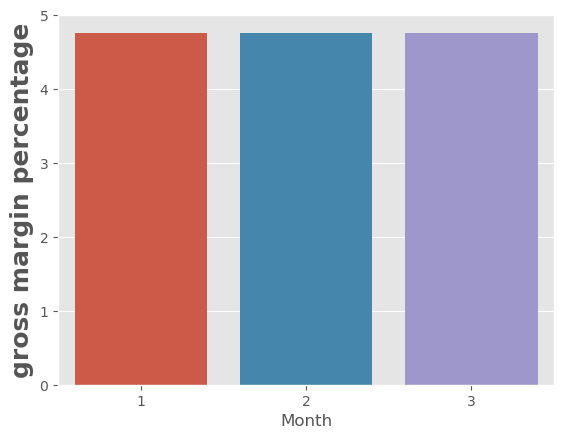

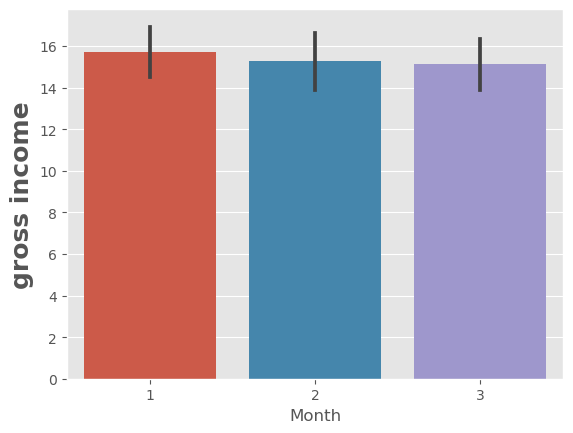

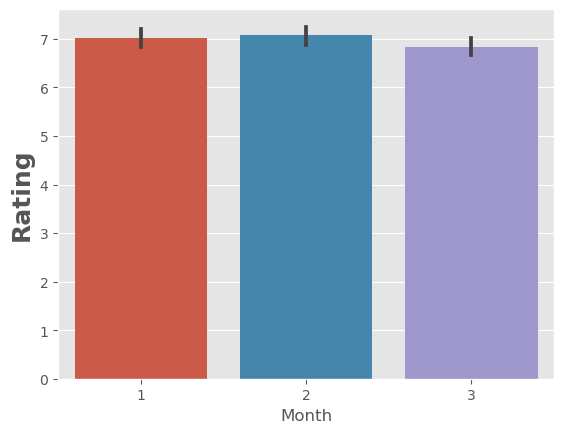

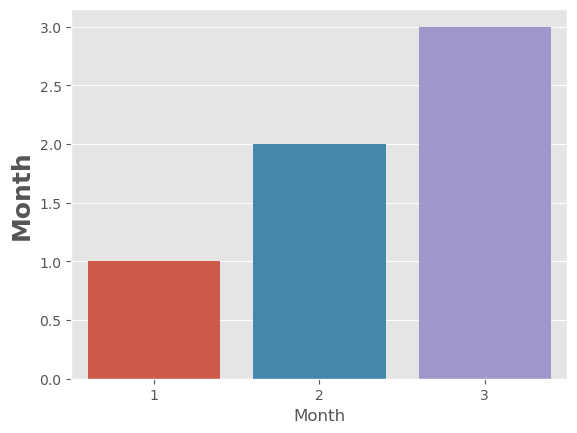

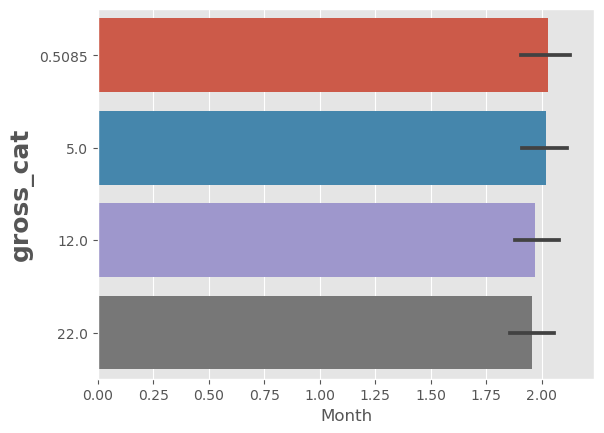

In [ ]:
for p in sp.columns:
    sns.barplot(data=sp, x= 'Month', y=p)
    plt.ylabel(p, fontsize=18, fontweight='bold')
    plt.show()
    # for loop

In [ ]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Invoice ID               1000 non-null   object  
 1   Branch                   1000 non-null   object  
 2   City                     1000 non-null   object  
 3   Customer type            1000 non-null   object  
 4   Gender                   1000 non-null   object  
 5   Product line             1000 non-null   object  
 6   Unit price               1000 non-null   float64 
 7   Quantity                 1000 non-null   int64   
 8   Tax 5%                   1000 non-null   float64 
 9   Total                    1000 non-null   float64 
 10  Date                     1000 non-null   object  
 11  Time                     1000 non-null   object  
 12  Payment                  1000 non-null   object  
 13  cogs                     1000 non-null   float64 
 14  gross mar

Observations

The supermarket data is from 3 months/ 1st quarter of 2019 respectivily
. Branch- A performed well, while C performed lower in transections 
. Customer type - Normal retailers peformed better in the first 2 months
. Health and beauty - out peformed in the begining of the quarter, with food and beverages. An overviewer in promotions is suplimented
. Unit price - our price model performed better in Month 2 wthin the Quarter
. Quantity - Month 1, a lot of stock depreciated, while Month 2 and 3 mantainted a balance in how much our consumers brought
. Gross income, highlighted Month 2, even though not much inventory was brought, yet the suppermarket chain made profit equivilent to Month 1
Gross Income was >= above 16000. A profitable 1st Quarter of 2019
. Customer sentiment lowered in Month 3
. Most of our customers spend below <= 5.0 per transection in the first two Month.


Promotions strategyies

1. create discounts promotions to Mandalay brench to boast profits.
2. the current membership package is benefiting our customers
3. create marketing advetisiment also geared for men, since they dispose the quality our profits.
4. Next quarter, promote more lifestyle and fashion.
5. security in our stores and ATM. most of our customers are users of them.
6. sentiments where low in the last month of the quarter, 4th month can be predicted as well. lets find some of the problems in our locations or maybe social media.
7. discount above 22.0 priced inventory and add an incentive for customers purchasing below 5.0 inventory.